# Tarea Semana 3 - Machine Learning.

En esta semana el objetivo es trabajar con el algoritmo de aprendizaje no supervisado k-means.
En este caso utilizaremos el dataset USArrests
- Investigar el metodo del codo (elbow method) para identificar la cantidad optima de clusters
- Ejecutar k-means para la cantidad de clusters identificada como optima
- Graficar el resultado donde se visualicen los puntos y los clusters


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('USArrest.xlsx', index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


A data frame with 50 observations on 4 variables.

- [,1]	Murder	numeric	Murder arrests (per 100,000)

- [,2]	Assault	numeric	Assault arrests (per 100,000)

- [,3]	UrbanPop	numeric	Percent urban population

- [,4]	Rape	numeric	Rape arrests (per 100,000)

Fuente: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df = df.astype(np.float64)
df.dtypes

Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

# Estandarizar Datos

"Dado que los algoritmos de agrupación en clústeres (incluido kmeans)  utilizan mediciones basadas en la distancia para determinar la similitud entre los puntos de datos, se recomienda estandarizar los datos para que tengan una media de cero y una desviación estándar de uno, ya que casi siempre las características de cualquier conjunto de datos tienen diferentes unidades de medida. ( Ejemplo: la edad frente a los ingresos.)"

Fuente: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [6]:
from sklearn.preprocessing import StandardScaler,normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

scaled_df = pd.DataFrame(scaled_df,columns=df.columns) 

In [7]:
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# Elbow Method

"La idea básica de los algoritmos de clustering es la minimización de la varianza intra-cluster y la maximización de la varianza inter-cluster. Es decir, queremos que cada observación se encuentre muy cerca a las de su mismo grupo y los grupos lo más lejos posible entre ellos.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster."

Fuente: https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/

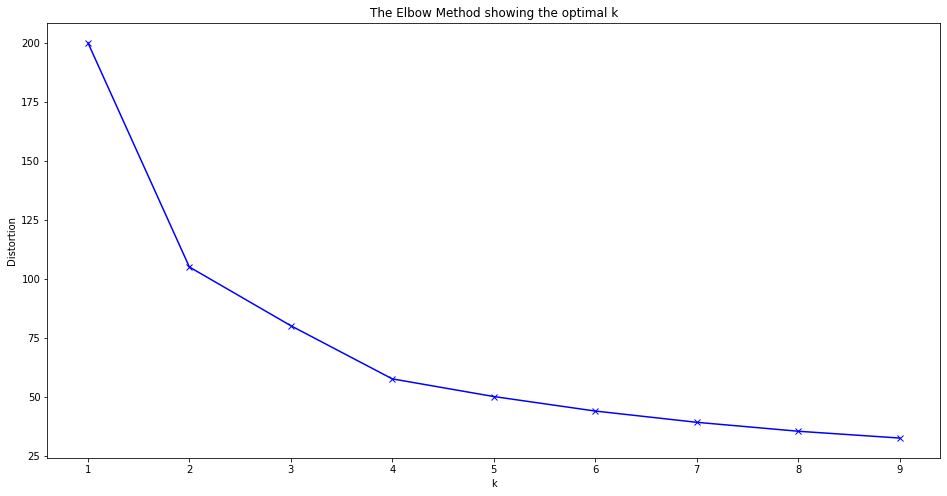

In [8]:
# Metodo del Codo para encontrar el numero optimo de clusters

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Se puede observar que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 4, por lo que se puede concluir el número óptimo de clusters será de 4.

## The Silhouette Method

"El valor de silueta mide qué tan similar es un punto a su propio grupo (cohesión) en comparación con otros grupos (separación).
El rango del valor de silueta está entre +1 y -1. La puntuación de silueta alcanza su máximo global en el k óptimo."

Fuente: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [9]:
from sklearn.metrics import silhouette_score

   
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(scaled_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(scaled_df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.4084890326217641
For n_clusters=3, The Silhouette Coefficient is 0.30813622648945616
For n_clusters=4, The Silhouette Coefficient is 0.3441080718209351
For n_clusters=5, The Silhouette Coefficient is 0.2892698909578641
For n_clusters=6, The Silhouette Coefficient is 0.29011172613433045
For n_clusters=7, The Silhouette Coefficient is 0.25335136481559895
For n_clusters=8, The Silhouette Coefficient is 0.2855253925683888
For n_clusters=9, The Silhouette Coefficient is 0.22952728664214234
For n_clusters=10, The Silhouette Coefficient is 0.26298188776795905


En este caso se puede concluir que el número óptimo de clusters es 2, seguido de 4. Con el objetivo de realizar esta tarea se utiliza el número obtenido en el método del codo. 

# K-Means

## Reducir las dimensiones usando Principal Component Analysis (PCA)

Se reducen las dimensiones a 2 para una mejor visualización de los resultados.

In [10]:
pca = PCA(n_components=2)
data = pca.fit_transform(scaled_df)

Una de las consecuencias de este cambio es que existe perdida de información. Por esta razón, se calcula "Explained Variance Ratio" para conocer el porcentaje de datos originales con los que se cuenta.

In [11]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.62006039 0.24744129]
Cumulative variance explained by 2 principal components: 86.75%


## Graficar resultado

In [12]:
model = KMeans(n_clusters = 4 )
label = model.fit_predict(data)

In [13]:
centers = np.array(model.cluster_centers_)

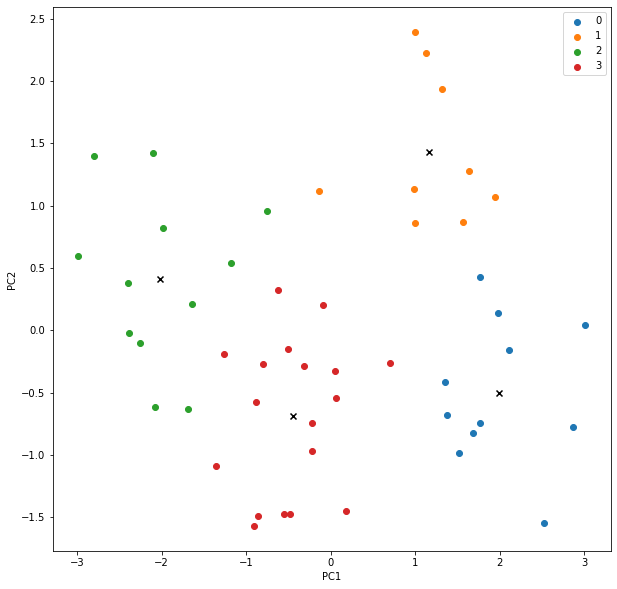

In [14]:
plt.figure(figsize=(10,10))
uniq = np.unique(label)

for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)

plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()


Se pueden visualizar los 4 clusters con distintos colores y los centroides indicados con el símbolo "x".

In [15]:
#Agregamos la etiqueta del cluster correspondiente al df original

df["c"] = model.predict(data)
df.head(50)

,Murder,Assault,UrbanPop,Rape,c
Alabama,13.2,236.0,58.0,21.2,1
Alaska,10.0,263.0,48.0,44.5,1
Arizona,8.1,294.0,80.0,31.0,0
Arkansas,8.8,190.0,50.0,19.5,1
California,9.0,276.0,91.0,40.6,0
Colorado,7.9,204.0,78.0,38.7,0
Connecticut,3.3,110.0,77.0,11.1,3
Delaware,5.9,238.0,72.0,15.8,3
Florida,15.4,335.0,80.0,31.9,0
Georgia,17.4,211.0,60.0,25.8,1


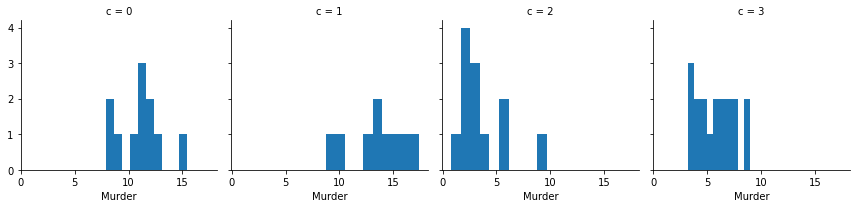

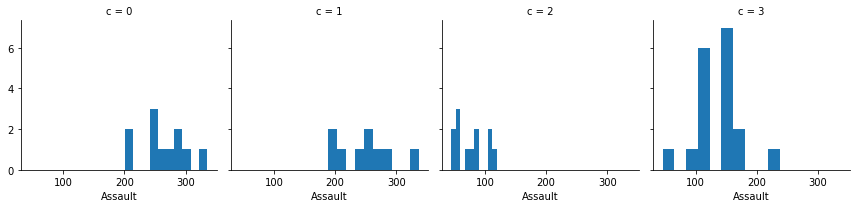

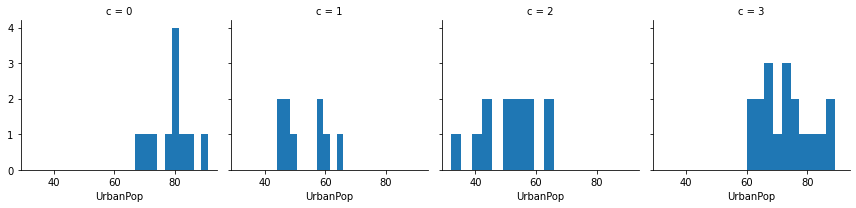

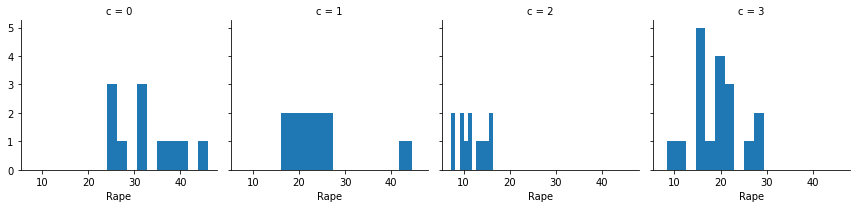

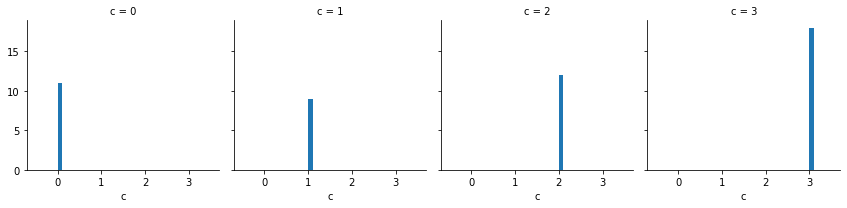

In [16]:
import seaborn as sns
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

## Fuentes consultadas

- https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
- https://aprendeia.com/agrupamiento-kmeans-practica-con-python/
- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
- https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://predictivehacks.com/k-means-elbow-method-code-for-python/
- https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/
- https://chrisalbon.com/code/machine_learning/clustering/k-means_clustering/
- https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/